In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


- убрать айди из признаков
- сделать предсказания кол-ва наудов для группы
- разбить на 2 и 3+

In [15]:
df = pd.read_csv('dataset_ok.csv')
df = df[df['Форма образования'] == 'Очная форма']
df

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости,ID ЛК,Иностранец,Курс,finans,status,Уровень образования,Форма образования,Сезон,Год,visit
0,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,56.712963
1,10119,2,10,Антенны сверхвысоких частот,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,spring,2024,29.166667
2,10119,3,9,Основы автоматизированного проектирования анте...,каф.ТОР,К/проект,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,56.712963
3,10119,3,9,Радиоэлектронные системы и комплексы,каф.РС,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,41.666667
4,10119,3,9,Устройства сверхвысоких частот,каф.ТОР,К/работа,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134658,10280323,3,2,Иностранный язык,каф.ИНЯЗ,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,57.142857
134659,10280323,4,1,Иностранный язык,каф.ИНЯЗ,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,autumn,2023,73.333333
134660,10280323,4,2,Информационные технологии,каф.САПР,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,3.571429
134661,10280323,5,1,Физическая культура и спорт,каф.ФВиС,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,autumn,2023,66.666667


In [16]:
gr = pd.read_csv('students_plus_groups.csv')
gr = gr[['Группа', 'ID ЛК']]

In [17]:
res = pd.merge(df, gr, on='ID ЛК', how='left')
res

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости,ID ЛК,Иностранец,Курс,finans,status,Уровень образования,Форма образования,Сезон,Год,visit,Группа
0,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,56.712963,9112
1,10119,2,10,Антенны сверхвысоких частот,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,spring,2024,29.166667,9112
2,10119,3,9,Основы автоматизированного проектирования анте...,каф.ТОР,К/проект,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,56.712963,9112
3,10119,3,9,Радиоэлектронные системы и комплексы,каф.РС,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,41.666667,9112
4,10119,3,9,Устройства сверхвысоких частот,каф.ТОР,К/работа,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,25.000000,9112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154879,10280323,3,2,Иностранный язык,каф.ИНЯЗ,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,57.142857,3354
154880,10280323,4,1,Иностранный язык,каф.ИНЯЗ,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,autumn,2023,73.333333,3354
154881,10280323,4,2,Информационные технологии,каф.САПР,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,3.571429,3354
154882,10280323,5,1,Физическая культура и спорт,каф.ФВиС,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,autumn,2023,66.666667,3354


In [58]:
df = res.copy()

In [13]:
df = pd.get_dummies(res)

In [93]:
df = df[(df['Кафедра'] != 'Баз.каф.ВТ') & (df['Кафедра'] != 'Сезон_spring') & (df['Кафедра'] != 'Баз.каф.ИИТ') & (df['Кафедра'] != 'каф.ФВиС')]

In [94]:
df['Кафедра'].unique()

array(['каф.ТОР', 'каф.РС', 'каф.ТВ', 'каф.РЭС', 'каф.ТОЭ', 'каф.ВМ',
       'каф.Физики', 'каф.МИТ', 'каф.СП', 'каф.ИНЯЗ', 'каф.ПЭ',
       'каф.ПМИГ', 'каф.ФЛ', 'каф.ИКГП', 'каф.ФЭТ', 'каф.Фот', 'каф.ЭПУ',
       'каф.МВЭ', 'каф.МНЭ', 'каф.ИИСТ', 'каф.БЖД', 'каф.ФХ', 'каф.ИЗОС',
       'каф.ИБ', 'каф.ИС', 'каф.САПР', 'каф.ИМ', 'каф.АМ', 'каф.АПУ',
       'каф.ВТ', 'каф.САУ', 'каф.РЯ', 'каф.РАПС', 'каф.КСУ', 'каф.ЭТПТ',
       'каф.БТС', 'каф.ЭУТ', 'каф.ЛИНС', 'каф.МСК', 'каф.СО', 'каф.МОЭВМ',
       'каф.ЭТП', 'Баз.каф.ОЭ', 'ИК', 'каф.ЭП', 'Баз.каф.КТЭА',
       'Баз.каф.ПАО ГИС'], dtype=object)

In [95]:
X_train = df[df['Год'] == 2023].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон'], axis=1).reset_index(drop=True)
y_train = df[df['Год'] == 2023]['ПерваяПопытка'].reset_index(drop=True)

X_test = df[df['Год'] == 2024].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон'], axis=1).reset_index(drop=True)
y_test = df[df['Год'] == 2024]['ПерваяПопытка'].reset_index(drop=True)

In [96]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

Accuracy: 0.397918198046834
Classification Report:
              precision    recall  f1-score   support

           2       0.32      0.32      0.32     10140
           3       0.28      0.29      0.29     13544
           4       0.34      0.38      0.36     22591
           5       0.54      0.49      0.51     29909

    accuracy                           0.40     76184
   macro avg       0.37      0.37      0.37     76184
weighted avg       0.41      0.40      0.40     76184



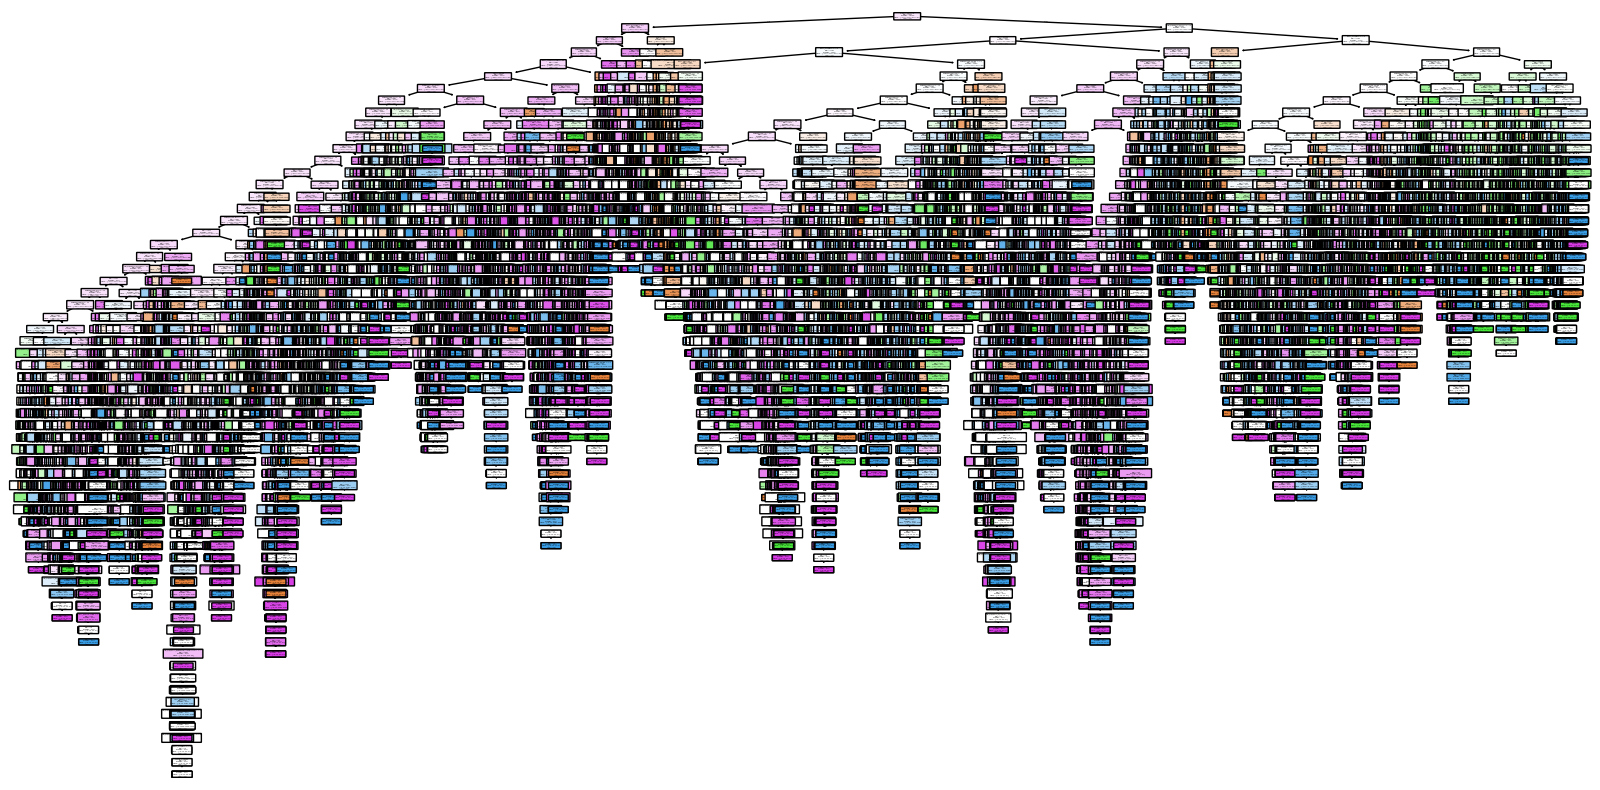

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


# Визуализация дерева решений
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=True, rounded=True, proportion=True)
plt.show()

- Кафедра_Баз.каф.ВТ
- Сезон_spring
Feature names seen at fit time, yet now missing:
- Кафедра_Баз.каф.ИИТ
- Кафедра_каф.ФВиС

In [97]:
import numpy as np

# Создание и обучение модели дерева решений
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = tree.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
class_names = target_encoder.classes_  # Получение строковых названий классов
report = classification_report(y_test, y_pred, target_names=class_names)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Визуализация дерева решений
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=class_names)
plt.show()

TypeError: object of type 'numpy.int64' has no len()

In [100]:
X_train = df[df['Год'] == 2023].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон', 'НомерЛД', 'ID ЛК'], axis=1).reset_index(drop=True)
y_train = df[df['Год'] == 2023]['ПерваяПопытка'].reset_index(drop=True)

X_test = df[df['Год'] == 2024].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон', 'НомерЛД', 'ID ЛК'], axis=1).reset_index(drop=True)
y_test = df[df['Год'] == 2024]['ПерваяПопытка'].reset_index(drop=True)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

tree = DecisionTreeClassifier(random_state=43)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.37083902131681196
Classification Report:
              precision    recall  f1-score   support

           2       0.26      0.35      0.30     10140
           3       0.28      0.28      0.28     13544
           4       0.33      0.35      0.34     22591
           5       0.51      0.43      0.47     29909

    accuracy                           0.37     76184
   macro avg       0.35      0.35      0.35     76184
weighted avg       0.38      0.37      0.38     76184



In [101]:
X_train = df[df['Год'] == 2023].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон', 'НомерЛД'], axis=1).reset_index(drop=True)
y_train = df[df['Год'] == 2023]['ПерваяПопытка'].reset_index(drop=True)

X_test = df[df['Год'] == 2024].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон', 'НомерЛД'], axis=1).reset_index(drop=True)
y_test = df[df['Год'] == 2024]['ПерваяПопытка'].reset_index(drop=True)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.3901081591935314
Classification Report:
              precision    recall  f1-score   support

           2       0.30      0.32      0.31     10140
           3       0.28      0.27      0.27     13544
           4       0.33      0.36      0.35     22591
           5       0.53      0.49      0.51     29909

    accuracy                           0.39     76184
   macro avg       0.36      0.36      0.36     76184
weighted avg       0.40      0.39      0.39     76184



In [103]:
X_train = df[df['Год'] == 2023].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон', 'НомерЛД'], axis=1).reset_index(drop=True)
y_train = df[df['Год'] == 2023]['ПерваяПопытка'].reset_index(drop=True)
y_train = y_train.map({2: 2, 3: 3, 4: 3, 5: 3})

X_test = df[df['Год'] == 2024].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон', 'НомерЛД'], axis=1).reset_index(drop=True)
y_test = df[df['Год'] == 2024]['ПерваяПопытка'].reset_index(drop=True)
y_test = y_test.map({2: 2, 3: 3, 4: 3, 5: 3})

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8024519584164654
Classification Report:
              precision    recall  f1-score   support

           2       0.30      0.36      0.32     10140
           3       0.90      0.87      0.88     66044

    accuracy                           0.80     76184
   macro avg       0.60      0.61      0.60     76184
weighted avg       0.82      0.80      0.81     76184



In [111]:
X_train = df[df['Год'] == 2023].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон'], axis=1).reset_index(drop=True)
y_train = df[df['Год'] == 2023]['ПерваяПопытка'].reset_index(drop=True)

X_test = df[df['Год'] == 2024].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон'], axis=1).reset_index(drop=True)
y_test = df[df['Год'] == 2024]['ПерваяПопытка'].reset_index(drop=True)

y_train = y_train.map({2: 2, 3: 3, 4: 3, 5: 3})
y_test = y_test.map({2: 2, 3: 3, 4: 3, 5: 3})

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

tree = DecisionTreeClassifier(random_state=46)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8139504357870418
Classification Report:
              precision    recall  f1-score   support

           2       0.32      0.36      0.34     10140
           3       0.90      0.88      0.89     66044

    accuracy                           0.81     76184
   macro avg       0.61      0.62      0.62     76184
weighted avg       0.82      0.81      0.82     76184



In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
def conf_matrix(y_test, y_pred, class_names):
    confmat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=class_names)
    disp.plot(cmap='viridis')
    plt.grid(False)
    plt.title('Матрица ошибок')
    plt.show()

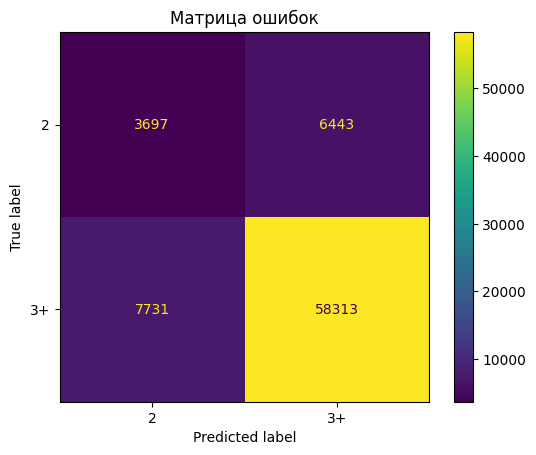

In [109]:
class_names = ['2', '3+'] 
conf_matrix(y_test, y_pred, class_names)

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(tree, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=True, 
          rounded=True, 
          proportion=True, 
          max_depth=5)  # Обрезаем дерево на уровне 5
plt.show()

NameError: name 'tree' is not defined

<Figure size 2000x1000 with 0 Axes>

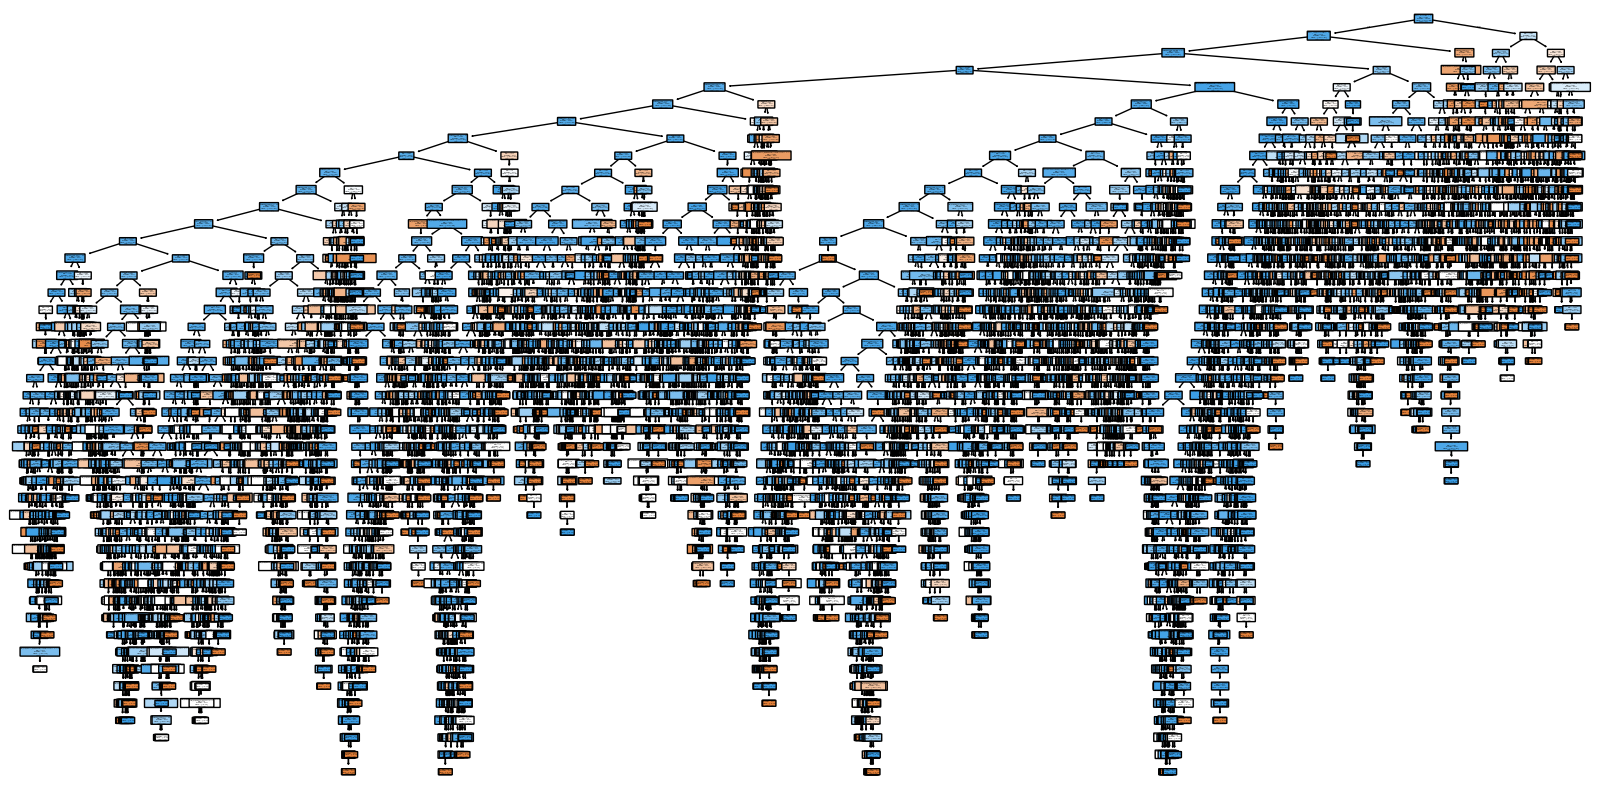

In [112]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=True, rounded=True, proportion=True)
plt.show()

In [110]:
X_train = df[(df['Семестр'] == 1) & (df['Уровень образования'] == 'Бакалавриат')].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон'], axis=1).reset_index(drop=True)
y_train = df[(df['Семестр'] == 1) & (df['Уровень образования'] == 'Бакалавриат')]['ПерваяПопытка'].reset_index(drop=True)

X_test = df[(df['Семестр'] == 2) & (df['Уровень образования'] == 'Бакалавриат')].drop(['ПерваяПопытка', 'Дисциплина', 'Сезон'], axis=1).reset_index(drop=True)
y_test = df[(df['Семестр'] == 2) & (df['Уровень образования'] == 'Бакалавриат')]['ПерваяПопытка'].reset_index(drop=True)

y_train = y_train.map({2: 2, 3: 3, 4: 3, 5: 3})
y_test = y_test.map({2: 2, 3: 3, 4: 3, 5: 3})

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

tree = DecisionTreeClassifier(random_state=46)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Кафедра_каф.БЖД
Feature names seen at fit time, yet now missing:
- status_Академический
